# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
     
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="+ city
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=8da97d9972d58c8f6fdf5fab1b4bd4e3&units=imperial&q=labuhan'

In [5]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 112.21, 'lat': -6.88},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 77.74,
  'feels_like': 83.23,
  'temp_min': 77.74,
  'temp_max': 77.74,
  'pressure': 1009,
  'humidity': 84,
  'sea_level': 1009,
  'grnd_level': 1009},
 'wind': {'speed': 6.13, 'deg': 165},
 'clouds': {'all': 100},
 'dt': 1588023614,
 'sys': {'country': 'ID', 'sunrise': 1588026724, 'sunset': 1588069498},
 'timezone': 25200,
 'id': 8079926,
 'name': 'Labuhan',
 'cod': 200}

In [14]:

# set up lists to hold reponse info

dic = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q="+ city
    response = requests.get(query_url).json()
    print(response)
    try:
        a = {
              "({'name': ['Raphael', 'Donatello'],
                   'mask': ['red', 'purple'],
                   'weapon': ['sai', 'bo staff']}) response['wind']['speed']
}
        dic.append(a)
        
    except: 
        print('city not found')
        pass


{'coord': {'lon': -40.12, 'lat': -2.89}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 78.96, 'feels_like': 81.86, 'temp_min': 78.96, 'temp_max': 78.96, 'pressure': 1012, 'humidity': 84, 'sea_level': 1012, 'grnd_level': 1011}, 'wind': {'speed': 11.9, 'deg': 126}, 'rain': {'1h': 0.49}, 'clouds': {'all': 91}, 'dt': 1588024917, 'sys': {'country': 'BR', 'sunrise': 1587976642, 'sunset': 1588019907}, 'timezone': -10800, 'id': 3408368, 'name': 'Acaraú', 'cod': 200}
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 76.87, 'feels_like': 75.22, 'temp_min': 76.87, 'temp_max': 76.87, 'pressure': 1017, 'humidity': 83, 'sea_level': 1017, 'grnd_level': 1014}, 'wind': {'speed': 17.69, 'deg': 80}, 'clouds': {'all': 57}, 'dt': 1588024917, 'sys': {'country': 'PF', 'sunrise': 1588000690, 'sunset': 1588041383}, 

{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 89.87, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 60}, 'clouds': {'all': 98}, 'dt': 1588024928, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 'sunrise': 1588006514, 'sunset': 1588047467}, 'timezone': -36000, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
{'coord': {'lon': -52.95, 'lat': 5.38}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.15, 'feels_like': 79.93, 'temp_min': 78.15, 'temp_max': 78.15, 'pressure': 1012, 'humidity': 80, 'sea_level': 1012, 'grnd_level': 1012}, 'wind': {'speed': 11.74, 'deg': 45}, 'clouds': {'all': 93}, 'dt': 1588024959, 'sys': {'country': 'GF', 'sunrise': 1587979224, 'sunset': 1588023484}, 'timezone': -

{'coord': {'lon': -155.09, 'lat': 19.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 74.3, 'feels_like': 77.2, 'temp_min': 71.01, 'temp_max': 77, 'pressure': 1019, 'humidity': 78}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 60}, 'rain': {'1h': 0.76}, 'clouds': {'all': 90}, 'dt': 1588024965, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1588002803, 'sunset': 1588048926}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
{'coord': {'lon': 92.9, 'lat': 20.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.18, 'feels_like': 83.35, 'temp_min': 79.18, 'temp_max': 79.18, 'pressure': 1011, 'humidity': 71, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 5.21, 'deg': 27}, 'clouds': {'all': 85}, 'dt': 1588024965, 'sys': {'country': 'MM', 'sunrise': 1588029645, 'sunset': 1588075845}, 'time

{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.2, 'feels_like': 80.24, 'temp_min': 81, 'temp_max': 84.2, 'pressure': 1010, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1588024971, 'sys': {'type': 1, 'id': 8521, 'country': 'EC', 'sunrise': 1587988568, 'sunset': 1588032090}, 'timezone': -21600, 'id': 3652764, 'name': 'Puerto Ayora', 'cod': 200}
{'coord': {'lon': 17.94, 'lat': -33.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 54.66, 'temp_min': 59, 'temp_max': 59, 'pressure': 1021, 'humidity': 67}, 'wind': {'speed': 6.93, 'deg': 190}, 'clouds': {'all': 0}, 'dt': 1588024971, 'sys': {'type': 1, 'id': 1943, 'country': 'ZA', 'sunrise': 1588051170, 'sunset': 1588090297}, 'timezone': 7200, 'id': 3361934, 'name': 'Sald

{'coord': {'lon': 31.9, 'lat': 54.43}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 35.6, 'feels_like': 28.31, 'temp_min': 35.6, 'temp_max': 35.6, 'pressure': 1011, 'humidity': 79, 'sea_level': 1011, 'grnd_level': 988}, 'wind': {'speed': 6.04, 'deg': 300}, 'clouds': {'all': 26}, 'dt': 1588024976, 'sys': {'country': 'RU', 'sunrise': 1588040404, 'sunset': 1588094363}, 'timezone': 10800, 'id': 525426, 'name': 'Sobolevo', 'cod': 200}
{'coord': {'lon': 48.48, 'lat': 8.41}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.74, 'feels_like': 82.4, 'temp_min': 79.74, 'temp_max': 79.74, 'pressure': 1013, 'humidity': 63, 'sea_level': 1013, 'grnd_level': 962}, 'wind': {'speed': 5.46, 'deg': 225}, 'clouds': {'all': 99}, 'dt': 1588024976, 'sys': {'country': 'SO', 'sunrise': 1588041080, 'sunset': 1588085729}, 'timezone': 10800, 'id':

{'coord': {'lon': 65.76, 'lat': 57.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.8, 'feels_like': 46.92, 'temp_min': 51.8, 'temp_max': 51.8, 'pressure': 1002, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 2.77, 'deg': 83}, 'clouds': {'all': 95}, 'dt': 1588024980, 'sys': {'type': 1, 'id': 8988, 'country': 'RU', 'sunrise': 1588031698, 'sunset': 1588086817}, 'timezone': 18000, 'id': 1511538, 'name': 'Antipino', 'cod': 200}
{'coord': {'lon': -156.79, 'lat': 71.29}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 10.4, 'feels_like': -1.46, 'temp_min': 10.4, 'temp_max': 10.4, 'pressure': 1000, 'humidity': 78}, 'visibility': 6437, 'wind': {'speed': 10.29, 'deg': 280}, 'clouds': {'all': 90}, 'dt': 1588024981, 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 1587992164, 'sunset': 1588060382}, 'timezone': -28800

{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': 69.9, 'lat': 60.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.42, 'feels_like': 44.01, 'temp_min': 48.42, 'temp_max': 48.42, 'pressure': 1005, 'humidity': 69, 'sea_level': 1005, 'grnd_level': 1001}, 'wind': {'speed': 3.44, 'deg': 51}, 'clouds': {'all': 97}, 'dt': 1588024984, 'sys': {'country': 'RU', 'sunrise': 1588029932, 'sunset': 1588086597}, 'timezone': 18000, 'id': 1506268, 'name': 'Gornopravdinsk', 'cod': 200}
{'coord': {'lon': 9.78, 'lat': 0.38}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 91.62, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1013, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1588024985, 'sys': {'type': 1, 'id': 2190, 'country': 'GA', 'sunr

{'coord': {'lon': 65.69, 'lat': 40.56}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 60.98, 'temp_min': 60.8, 'temp_max': 60.8, 'pressure': 1008, 'humidity': 93}, 'visibility': 2900, 'wind': {'speed': 4.7, 'deg': 270}, 'clouds': {'all': 100}, 'dt': 1588024990, 'sys': {'type': 1, 'id': 9007, 'country': 'UZ', 'sunrise': 1588034386, 'sunset': 1588084163}, 'timezone': 18000, 'id': 1513087, 'name': 'Nurota', 'cod': 200}
{'coord': {'lon': 151.83, 'lat': -26.53}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 62.78, 'feels_like': 63.05, 'temp_min': 62.6, 'temp_max': 63, 'pressure': 1022, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1588024990, 'sys': {'type': 1, 'id': 9535, 'country': 'AU', 'sunrise': 1588018509, 'sunset': 1588058697}, 'timezone': 36000, 'id': 2

{'coord': {'lon': 136.77, 'lat': -12.23}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 86.47, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1011, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1588024867, 'sys': {'type': 1, 'id': 9576, 'country': 'AU', 'sunrise': 1588021160, 'sunset': 1588063274}, 'timezone': 34200, 'id': 2064735, 'name': 'Nhulunbuy', 'cod': 200}
{'coord': {'lon': -3.53, 'lat': 18.9}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 88.75, 'feels_like': 78.4, 'temp_min': 88.75, 'temp_max': 88.75, 'pressure': 1013, 'humidity': 11, 'sea_level': 1013, 'grnd_level': 983}, 'wind': {'speed': 10.94, 'deg': 13}, 'clouds': {'all': 46}, 'dt': 1588024995, 'sys': {'country': 'ML', 'sunrise': 1587966502, 'sunset': 1588012486}, 'timezone': 0

{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': 113.88, 'lat': 29.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 58.14, 'feels_like': 55.9, 'temp_min': 58.14, 'temp_max': 58.14, 'pressure': 1021, 'humidity': 73, 'sea_level': 1021, 'grnd_level': 1016}, 'wind': {'speed': 3.89, 'deg': 81}, 'clouds': {'all': 1}, 'dt': 1588025005, 'sys': {'country': 'CN', 'sunrise': 1588023878, 'sunset': 1588071542}, 'timezone': 28800, 'id': 1798473, 'name': 'Puqi', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': -84.53, 'lat': 39.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 65.86, 'feels_like': 57.49, 'temp_min': 64, 'temp_max': 68, 'pressure': 1020, 'humidity': 31}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 220}, 'clouds': {'all': 1}, 'dt': 1588024758, 'sys': {'type

{'coord': {'lon': -68.91, 'lat': 44.81}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 42.84, 'feels_like': 30.97, 'temp_min': 41, 'temp_max': 44.01, 'pressure': 1016, 'humidity': 68}, 'visibility': 16093, 'wind': {'speed': 14.99, 'deg': 50, 'gust': 23.04}, 'rain': {'1h': 0.25}, 'clouds': {'all': 90}, 'dt': 1588024904, 'sys': {'type': 1, 'id': 3430, 'country': 'US', 'sunrise': 1587979831, 'sunset': 1588030536}, 'timezone': -14400, 'id': 4966992, 'name': 'Hermon', 'cod': 200}
{'coord': {'lon': 79.52, 'lat': 26.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.76, 'feels_like': 79.81, 'temp_min': 80.76, 'temp_max': 80.76, 'pressure': 1008, 'humidity': 41, 'sea_level': 1008, 'grnd_level': 992}, 'wind': {'speed': 4.36, 'deg': 81}, 'clouds': {'all': 2}, 'dt': 1588025034, 'sys': {'country': 'IN', 'sunrise': 1588032383, 'sunset': 1588079

{'coord': {'lon': -4.75, 'lat': 43.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.35, 'feels_like': 52.56, 'temp_min': 53.01, 'temp_max': 54, 'pressure': 1007, 'humidity': 98}, 'wind': {'speed': 2.95, 'deg': 210}, 'clouds': {'all': 93}, 'dt': 1588025038, 'sys': {'type': 3, 'id': 2010396, 'country': 'ES', 'sunrise': 1588050936, 'sunset': 1588101421}, 'timezone': 7200, 'id': 3118304, 'name': 'Llanes', 'cod': 200}
{'coord': {'lon': 91.82, 'lat': 56.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 24.75, 'temp_min': 32, 'temp_max': 32, 'pressure': 1015, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 3.65, 'deg': 124}, 'clouds': {'all': 0}, 'dt': 1588025039, 'sys': {'type': 1, 'id': 8957, 'country': 'RU', 'sunrise': 1588025672, 'sunset': 1588080336}, 'timezone': 25200, 'id': 1538641, 'name': 'Kedr

{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': 177.48, 'lat': 64.75}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 8.6, 'feels_like': -1.26, 'temp_min': 8.6, 'temp_max': 8.6, 'pressure': 1006, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 180, 'gust': 8.95}, 'clouds': {'all': 20}, 'dt': 1588024864, 'sys': {'type': 1, 'id': 8872, 'country': 'RU', 'sunrise': 1588002520, 'sunset': 1588062375}, 'timezone': 43200, 'id': 2127202, 'name': 'Anadyr', 'cod': 200}
{'coord': {'lon': -51.99, 'lat': -6.64}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.36, 'feels_like': 81.68, 'temp_min': 75.36, 'temp_max': 75.36, 'pressure': 1011, 'humidity': 85, 'sea_level': 1011, 'grnd_level': 988}, 'wind': {'speed': 2.82, 'deg': 96}, 'clouds': {'all': 97}, 'dt': 1588024875, 'sys': {'country': 'BR', 'sunris

{'coord': {'lon': 37.07, 'lat': 10.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.78, 'feels_like': 59.59, 'temp_min': 64.78, 'temp_max': 64.78, 'pressure': 1014, 'humidity': 37, 'sea_level': 1014, 'grnd_level': 800}, 'wind': {'speed': 4.56, 'deg': 36}, 'clouds': {'all': 100}, 'dt': 1588025055, 'sys': {'country': 'ET', 'sunrise': 1588043672, 'sunset': 1588088613}, 'timezone': 10800, 'id': 341397, 'name': 'Burē', 'cod': 200}
{'coord': {'lon': 105.89, 'lat': 34.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.73, 'feels_like': 46.65, 'temp_min': 53.73, 'temp_max': 53.73, 'pressure': 1018, 'humidity': 29, 'sea_level': 1018, 'grnd_level': 895}, 'wind': {'speed': 4.07, 'deg': 160}, 'clouds': {'all': 93}, 'dt': 1588025055, 'sys': {'country': 'CN', 'sunrise': 1588025363, 'sunset': 1588073892}, 'timezone': 28800, 'id'

{'coord': {'lon': 98.63, 'lat': 9.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.82, 'feels_like': 85.48, 'temp_min': 78.82, 'temp_max': 78.82, 'pressure': 1010, 'humidity': 84, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 5.1, 'deg': 92}, 'clouds': {'all': 87}, 'dt': 1588025058, 'sys': {'country': 'TH', 'sunrise': 1588028948, 'sunset': 1588073791}, 'timezone': 25200, 'id': 1150965, 'name': 'Ranong', 'cod': 200}
{'coord': {'lon': 15.16, 'lat': -26.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.6, 'feels_like': 57.06, 'temp_min': 62.6, 'temp_max': 62.6, 'pressure': 1015, 'humidity': 77}, 'wind': {'speed': 12.75, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1588025058, 'sys': {'type': 1, 'id': 2260, 'country': 'NA', 'sunrise': 1588051331, 'sunset': 1588091471}, 'timezone': 7200, 'id': 3355672, 'name': 'Lüde

{'coord': {'lon': -114.06, 'lat': 27.98}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 77.29, 'feels_like': 69.17, 'temp_min': 77.29, 'temp_max': 77.29, 'pressure': 1013, 'humidity': 45, 'sea_level': 1013, 'grnd_level': 1013}, 'wind': {'speed': 16.75, 'deg': 321}, 'clouds': {'all': 33}, 'dt': 1588025062, 'sys': {'country': 'MX', 'sunrise': 1587992346, 'sunset': 1588039692}, 'timezone': -21600, 'id': 4021858, 'name': 'Guerrero Negro', 'cod': 200}
{'coord': {'lon': 102.5, 'lat': 71.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.99, 'feels_like': 4.44, 'temp_min': 14.99, 'temp_max': 14.99, 'pressure': 1006, 'humidity': 96, 'sea_level': 1006, 'grnd_level': 1003}, 'wind': {'speed': 8.97, 'deg': 225}, 'clouds': {'all': 100}, 'dt': 1588025062, 'sys': {'country': 'RU', 'sunrise': 1588015473, 'sunset': 1588085409}, 'time

{'coord': {'lon': 124.16, 'lat': 24.34}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 66.43, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1018, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1588025067, 'sys': {'type': 1, 'id': 8139, 'country': 'JP', 'sunrise': 1588021840, 'sunset': 1588068646}, 'timezone': 32400, 'id': 1861416, 'name': 'Ishigaki', 'cod': 200}
{'coord': {'lon': -56.09, 'lat': -9.88}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 90.95, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1012, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1588025067, 'sys': {'type': 1, 'id': 8308, 'country': 'BR', 'sunrise': 1587980897, 'sunset': 1588023317}, 'timezone': -14400, '

{'coord': {'lon': -51.33, 'lat': -30.11}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 70.99, 'feels_like': 64.17, 'temp_min': 70, 'temp_max': 71.6, 'pressure': 1021, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 21.92, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1588025677, 'sys': {'type': 1, 'id': 8467, 'country': 'BR', 'sunrise': 1587981124, 'sunset': 1588020805}, 'timezone': -10800, 'id': 3473964, 'name': 'Guaíba', 'cod': 200}
{'coord': {'lon': 39.51, 'lat': 68.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.49, 'feels_like': 20.23, 'temp_min': 26.49, 'temp_max': 26.49, 'pressure': 1010, 'humidity': 96, 'sea_level': 1010, 'grnd_level': 1008}, 'wind': {'speed': 3.27, 'deg': 340}, 'clouds': {'all': 98}, 'dt': 1588025677, 'sys': {'country': 'RU', 'sunrise': 1588033847, 'sunset': 1588097267}, 'timezone': 10800,

{'coord': {'lon': 178.42, 'lat': 69.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.06, 'feels_like': 19.87, 'temp_min': 26.06, 'temp_max': 26.06, 'pressure': 1001, 'humidity': 88, 'sea_level': 1001, 'grnd_level': 1001}, 'wind': {'speed': 2.66, 'deg': 260}, 'clouds': {'all': 5}, 'dt': 1588025684, 'sys': {'country': 'RU', 'sunrise': 1587999726, 'sunset': 1588064718}, 'timezone': 43200, 'id': 2123814, 'name': 'Leningradskiy', 'cod': 200}
{'coord': {'lon': 73, 'lat': 5.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 84.96, 'feels_like': 91.6, 'temp_min': 84.96, 'temp_max': 84.96, 'pressure': 1009, 'humidity': 78, 'sea_level': 1009, 'grnd_level': 1009}, 'wind': {'speed': 9.08, 'deg': 336}, 'rain': {'1h': 0.27}, 'clouds': {'all': 10}, 'dt': 1588025685, 'sys': {'country': 'MV', 'sunrise': 1588035367, 'sunset': 1588079673}, 'timezon

{'coord': {'lon': -42.07, 'lat': -16.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.27, 'feels_like': 68.45, 'temp_min': 68.27, 'temp_max': 68.27, 'pressure': 1020, 'humidity': 69, 'sea_level': 1020, 'grnd_level': 984}, 'wind': {'speed': 4.03, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1588025693, 'sys': {'country': 'BR', 'sunrise': 1587977968, 'sunset': 1588019517}, 'timezone': -10800, 'id': 3471846, 'name': 'Araçuaí', 'cod': 200}
{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21.83, 'feels_like': 14.61, 'temp_min': 21.83, 'temp_max': 21.83, 'pressure': 1008, 'humidity': 94, 'sea_level': 1008, 'grnd_level': 1003}, 'wind': {'speed': 4, 'deg': 332}, 'clouds': {'all': 1}, 'dt': 1588025693, 'sys': {'country': 'RU', 'sunrise': 1588014514, 'sunset': 1588076351}, 'timezone': 32400, 'id': 2012530,

{'coord': {'lon': -57.8, 'lat': -18.95}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 89.6, 'feels_like': 91.85, 'temp_min': 89.6, 'temp_max': 89.6, 'pressure': 1012, 'humidity': 43}, 'visibility': 6000, 'wind': {'speed': 4.7, 'deg': 10}, 'clouds': {'all': 41}, 'dt': 1588025711, 'sys': {'type': 1, 'id': 8335, 'country': 'BO', 'sunrise': 1587981881, 'sunset': 1588023154}, 'timezone': -14400, 'id': 3444199, 'name': 'Puerto Suárez', 'cod': 200}
{'coord': {'lon': -156.47, 'lat': 20.89}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 78.44, 'feels_like': 70.93, 'temp_min': 75.99, 'temp_max': 82.4, 'pressure': 1019, 'humidity': 58}, 'visibility': 16093, 'wind': {'speed': 20.8, 'deg': 40, 'gust': 27.51}, 'clouds': {'all': 40}, 'dt': 1588025711, 'sys': {'type': 1, 'id': 7879, 'country': 'US', 'sunrise': 1588003053, 'sunset': 1

{'coord': {'lon': -44.91, 'lat': -11.75}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 70.86, 'feels_like': 72.27, 'temp_min': 70.86, 'temp_max': 70.86, 'pressure': 1015, 'humidity': 75, 'sea_level': 1015, 'grnd_level': 958}, 'wind': {'speed': 5.08, 'deg': 142}, 'clouds': {'all': 13}, 'dt': 1588025730, 'sys': {'country': 'BR', 'sunrise': 1587978329, 'sunset': 1588020520}, 'timezone': -10800, 'id': 3451478, 'name': 'Riachão das Neves', 'cod': 200}
{'coord': {'lon': 71.65, 'lat': 34.3}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 71.15, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1014, 'humidity': 60}, 'visibility': 4000, 'wind': {'speed': 4.7, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1588025730, 'sys': {'type': 1, 'id': 7590, 'country': 'PK', 'sunrise': 1588033600, 'sunset': 1588082089}, 'timezone': 18000, 'id':

{'coord': {'lon': -3.52, 'lat': 36.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.79, 'feels_like': 54.25, 'temp_min': 54, 'temp_max': 60.01, 'pressure': 1016, 'humidity': 76}, 'wind': {'speed': 6.58, 'deg': 309}, 'clouds': {'all': 0}, 'dt': 1588025746, 'sys': {'type': 3, 'id': 2002005, 'country': 'ES', 'sunrise': 1588051388, 'sunset': 1588100379}, 'timezone': 7200, 'id': 2513477, 'name': 'Motril', 'cod': 200}
{'coord': {'lon': 113.61, 'lat': -8.35}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.17, 'feels_like': 82.49, 'temp_min': 76.17, 'temp_max': 76.17, 'pressure': 1010, 'humidity': 86, 'sea_level': 1010, 'grnd_level': 1007}, 'wind': {'speed': 3.87, 'deg': 79}, 'rain': {'1h': 0.17}, 'clouds': {'all': 93}, 'dt': 1588025747, 'sys': {'country': 'ID', 'sunrise': 1588026478, 'sunset': 1588069072}, 'timezone': 25200, 'id': 162

{'coord': {'lon': 94.73, 'lat': 16.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.57, 'feels_like': 82.63, 'temp_min': 76.57, 'temp_max': 76.57, 'pressure': 1010, 'humidity': 83, 'sea_level': 1010, 'grnd_level': 1009}, 'wind': {'speed': 3.71, 'deg': 313}, 'clouds': {'all': 89}, 'dt': 1588025756, 'sys': {'country': 'MM', 'sunrise': 1588029439, 'sunset': 1588075172}, 'timezone': 23400, 'id': 1328421, 'name': 'Pathein', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
city not found
{'coord': {'lon': 32.04, 'lat': -28.78}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.18, 'feels_like': 66.61, 'temp_min': 68.18, 'temp_max': 68.18, 'pressure': 1020, 'humidity': 86, 'sea_level': 1020, 'grnd_level': 1020}, 'wind': {'speed': 11.27, 'deg': 219}, 'rain': {'1h': 0.23}, 'clouds': {'all': 100}, 'dt': 1588025757, 'sys': {'co

{'coord': {'lon': 51.53, 'lat': 25.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.06, 'feels_like': 70.45, 'temp_min': 77, 'temp_max': 82.4, 'pressure': 1009, 'humidity': 23}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1588025594, 'sys': {'type': 1, 'id': 7614, 'country': 'QA', 'sunrise': 1588039189, 'sunset': 1588086156}, 'timezone': 10800, 'id': 290030, 'name': 'Doha', 'cod': 200}
{'coord': {'lon': 170.31, 'lat': 69.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.23, 'feels_like': 8.78, 'temp_min': 20.23, 'temp_max': 20.23, 'pressure': 1002, 'humidity': 94, 'sea_level': 1002, 'grnd_level': 997}, 'wind': {'speed': 11.25, 'deg': 165}, 'clouds': {'all': 87}, 'dt': 1588025766, 'sys': {'country': 'RU', 'sunrise': 1588001425, 'sunset': 1588066911}, 'timezone': 43200, 'id': 212

{'coord': {'lon': 76.1, 'lat': 34.57}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 35.4, 'feels_like': 26.82, 'temp_min': 35.4, 'temp_max': 35.4, 'pressure': 1025, 'humidity': 19, 'sea_level': 1025, 'grnd_level': 679}, 'wind': {'speed': 3.87, 'deg': 260}, 'clouds': {'all': 47}, 'dt': 1588025774, 'sys': {'country': 'IN', 'sunrise': 1588032507, 'sunset': 1588081046}, 'timezone': 19800, 'id': 1267776, 'name': 'Kargil', 'cod': 200}
{'coord': {'lon': 70.83, 'lat': 66.83}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28, 'feels_like': 21.36, 'temp_min': 28, 'temp_max': 28, 'pressure': 1010, 'humidity': 97, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 4.32, 'deg': 275}, 'clouds': {'all': 88}, 'dt': 1588025776, 'sys': {'country': 'RU', 'sunrise': 1588027056, 'sunset': 1588089027}, 'timezone': 18000, 'id': 148632

{'coord': {'lon': -73.36, 'lat': 41.14}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 45.18, 'feels_like': 34.74, 'temp_min': 44.01, 'temp_max': 46.4, 'pressure': 1015, 'humidity': 65}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 360}, 'rain': {'1h': 0.25}, 'clouds': {'all': 90}, 'dt': 1588025783, 'sys': {'type': 1, 'id': 3409, 'country': 'US', 'sunrise': 1587981341, 'sunset': 1588031162}, 'timezone': -14400, 'id': 4845585, 'name': 'Westport', 'cod': 200}
{'coord': {'lon': -40.29, 'lat': -20.33}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 75.94, 'feels_like': 75.43, 'temp_min': 75, 'temp_max': 77, 'pressure': 1020, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1588025783, 'sys': {'type': 1, 'id': 8474, 'country': 'BR', 'sunrise': 1587977769, 'sunset': 1588018861

{'coord': {'lon': -83.39, 'lat': 14.04}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 85.14, 'feels_like': 87.08, 'temp_min': 85.14, 'temp_max': 85.14, 'pressure': 1012, 'humidity': 65, 'sea_level': 1012, 'grnd_level': 1011}, 'wind': {'speed': 11.97, 'deg': 54}, 'rain': {'1h': 0.11}, 'clouds': {'all': 13}, 'dt': 1588025797, 'sys': {'country': 'NI', 'sunrise': 1587985985, 'sunset': 1588031332}, 'timezone': -21600, 'id': 3617154, 'name': 'Puerto Cabezas', 'cod': 200}
{'coord': {'lon': 155.63, 'lat': -6.22}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.95, 'feels_like': 92.34, 'temp_min': 83.95, 'temp_max': 83.95, 'pressure': 1010, 'humidity': 71, 'sea_level': 1010, 'grnd_level': 1007}, 'wind': {'speed': 1.97, 'deg': 149}, 'clouds': {'all': 10}, 'dt': 1588025798, 'sys': {'country': 'PG', 'sunrise': 1588016262, 'sunset': 1588059119},

{'coord': {'lon': -15.83, 'lat': 11.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.26, 'feels_like': 76.6, 'temp_min': 78.26, 'temp_max': 78.26, 'pressure': 1012, 'humidity': 70, 'sea_level': 1012, 'grnd_level': 1010}, 'wind': {'speed': 14.47, 'deg': 268}, 'clouds': {'all': 12}, 'dt': 1588025803, 'sys': {'country': 'GW', 'sunrise': 1587969952, 'sunset': 1588014939}, 'timezone': 0, 'id': 2374583, 'name': 'Bubaque', 'cod': 200}
{'coord': {'lon': 22.2, 'lat': 54.59}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 47.79, 'feels_like': 38.79, 'temp_min': 47.79, 'temp_max': 47.79, 'pressure': 1009, 'humidity': 67, 'sea_level': 1009, 'grnd_level': 1003}, 'wind': {'speed': 11.16, 'deg': 193}, 'clouds': {'all': 90}, 'dt': 1588025803, 'sys': {'country': 'RU', 'sunrise': 1588042695, 'sunset': 1588096727}, 'timezone': 7200, 'id': 5

{'coord': {'lon': 54.37, 'lat': 24.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 83.73, 'feels_like': 86.49, 'temp_min': 82.99, 'temp_max': 84.2, 'pressure': 1007, 'humidity': 62}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 320}, 'clouds': {'all': 2}, 'dt': 1588025774, 'sys': {'type': 1, 'id': 7533, 'country': 'AE', 'sunrise': 1588038571, 'sunset': 1588085412}, 'timezone': 14400, 'id': 292968, 'name': 'Abu Dhabi', 'cod': 200}
{'coord': {'lon': 166.44, 'lat': 68.05}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.73, 'feels_like': 21.78, 'temp_min': 27.73, 'temp_max': 27.73, 'pressure': 1003, 'humidity': 89, 'sea_level': 1003, 'grnd_level': 969}, 'wind': {'speed': 2.59, 'deg': 233}, 'clouds': {'all': 67}, 'dt': 1588025818, 'sys': {'country': 'RU', 'sunrise': 1588003481, 'sunset': 1588066712}, 'timezone': 43200, 'id

{'coord': {'lon': 159.59, 'lat': -8.14}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.7, 'feels_like': 91.85, 'temp_min': 84.7, 'temp_max': 84.7, 'pressure': 1010, 'humidity': 74, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 6.2, 'deg': 85}, 'clouds': {'all': 71}, 'dt': 1588025827, 'sys': {'country': 'SB', 'sunrise': 1588015429, 'sunset': 1588058052}, 'timezone': 39600, 'id': 2109528, 'name': 'Buala', 'cod': 200}
{'coord': {'lon': 3.19, 'lat': 13.05}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 89.94, 'feels_like': 87.89, 'temp_min': 89.94, 'temp_max': 89.94, 'pressure': 1009, 'humidity': 26, 'sea_level': 1009, 'grnd_level': 985}, 'wind': {'speed': 3.98, 'deg': 175}, 'clouds': {'all': 27}, 'dt': 1588025827, 'sys': {'country': 'NE', 'sunrise': 1587965276, 'sunset': 1588010486}, 'timezone': 3600, 'id': 24

{'coord': {'lon': 55.48, 'lat': -21.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.23, 'feels_like': 67.46, 'temp_min': 66, 'temp_max': 69.8, 'pressure': 1019, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1588025833, 'sys': {'type': 1, 'id': 2127, 'country': 'RE', 'sunrise': 1588041270, 'sunset': 1588082180}, 'timezone': 14400, 'id': 935214, 'name': 'Saint-Pierre', 'cod': 200}
{'coord': {'lon': 132.75, 'lat': -5.67}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.86, 'feels_like': 87.39, 'temp_min': 83.86, 'temp_max': 83.86, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 1008}, 'wind': {'speed': 13.02, 'deg': 154}, 'rain': {'1h': 1.65}, 'clouds': {'all': 98}, 'dt': 1588025834, 'sys': {'country': 'ID', 'sunrise': 1588021720, 'sunset': 158

{'coord': {'lon': -77.45, 'lat': 41.14}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 51.39, 'feels_like': 42.28, 'temp_min': 48.99, 'temp_max': 54, 'pressure': 1017, 'humidity': 54}, 'wind': {'speed': 10.74, 'deg': 354}, 'clouds': {'all': 65}, 'dt': 1588025841, 'sys': {'type': 3, 'id': 2005527, 'country': 'US', 'sunrise': 1587982322, 'sunset': 1588032144}, 'timezone': -14400, 'id': 5198635, 'name': 'Lock Haven', 'cod': 200}
{'coord': {'lon': 39.64, 'lat': -0.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.57, 'feels_like': 79.34, 'temp_min': 79.57, 'temp_max': 79.57, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 997}, 'wind': {'speed': 13.38, 'deg': 175}, 'clouds': {'all': 51}, 'dt': 1588025841, 'sys': {'country': 'KE', 'sunrise': 1588043748, 'sunset': 1588087304}, 'timezone': 10800, 'id': 197745

{'coord': {'lon': 70.45, 'lat': 34.43}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 75.43, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1016, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 2.51, 'deg': 143}, 'clouds': {'all': 75}, 'dt': 1588025845, 'sys': {'type': 1, 'id': 7375, 'country': 'AF', 'sunrise': 1588033875, 'sunset': 1588082389}, 'timezone': 16200, 'id': 1139715, 'name': 'Jalalabad', 'cod': 200}
{'coord': {'lon': 32.52, 'lat': 47.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 42.8, 'feels_like': 35.96, 'temp_min': 42.8, 'temp_max': 42.8, 'pressure': 1013, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1588025846, 'sys': {'type': 1, 'id': 8904, 'country': 'UA', 'sunrise': 1588041422, 'sunset': 1588093047}, 'timezone': 10800, 'i

{'coord': {'lon': 111.91, 'lat': 37.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.35, 'feels_like': 47.64, 'temp_min': 55.35, 'temp_max': 55.35, 'pressure': 1019, 'humidity': 32, 'sea_level': 1019, 'grnd_level': 931}, 'wind': {'speed': 5.93, 'deg': 198}, 'clouds': {'all': 0}, 'dt': 1588025853, 'sys': {'country': 'CN', 'sunrise': 1588023680, 'sunset': 1588072685}, 'timezone': 28800, 'id': 1805833, 'name': 'Jiexiu', 'cod': 200}
{'coord': {'lon': -60.7, 'lat': -31.63}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 69.22, 'feels_like': 71.94, 'temp_min': 69.01, 'temp_max': 70, 'pressure': 1008, 'humidity': 92}, 'wind': {'speed': 5.99, 'deg': 20, 'gust': 11.99}, 'rain': {'1h': 1.27}, 'clouds': {'all': 92}, 'dt': 1588025853, 'sys': {'type': 3, 'id': 2008823, 'country': 'AR', 'sunrise': 1587983495, 'sunset': 1588022931}, 'timezone

{'coord': {'lon': 150.86, 'lat': -34.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 67.86, 'feels_like': 65.62, 'temp_min': 66.99, 'temp_max': 69.01, 'pressure': 1019, 'humidity': 85}, 'wind': {'speed': 11.99, 'deg': 8, 'gust': 28.01}, 'clouds': {'all': 39}, 'dt': 1588025862, 'sys': {'type': 3, 'id': 2033627, 'country': 'AU', 'sunrise': 1588019387, 'sunset': 1588058284}, 'timezone': 36000, 'id': 6255012, 'name': 'Flinders', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weather_df = pd.DataFrame(dic)
weather_df

,city,lat,temp_max,lon,clouds,humidity,wind speed
0,acarau,-2.89,78.96,-40.12,91,84,11.90
1,rikitea,-23.12,76.87,-134.97,57,83,17.69
2,misratah,32.38,66.52,15.09,6,69,7.45
3,ushuaia,-54.80,46.40,-68.30,53,70,26.40
4,bluff,-46.60,52.00,168.33,43,73,7.00
...,...,...,...,...,...,...,...
560,formosa do rio preto,-11.05,71.74,-45.19,13,78,4.07
561,petropavlovsk-kamchatskiy,53.05,33.80,158.65,40,86,4.47
562,tshikapa,-6.42,72.59,20.80,100,80,2.66
563,srimushnam,11.40,82.80,79.42,99,77,2.48


In [28]:
weather_df.to_csv('city_file.csv')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
#  Get the indices of cities that have humidity over 100%.
highumidity_df = weather_df[weather_df['humidity']>100]
highumidity_df



,city,lat,temp_max,lon,clouds,humidity,wind speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

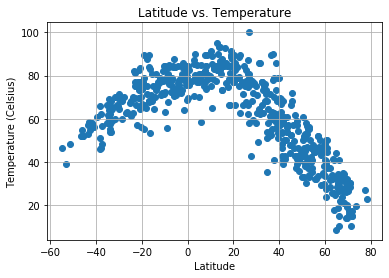

In [38]:
plt.scatter(weather_df["lat"], weather_df["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

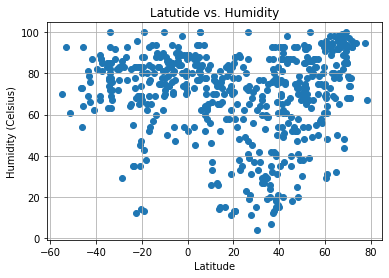

In [39]:
plt.scatter(weather_df["lat"], weather_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latutide vs. Humidity")
plt.ylabel("Humidity (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latutide_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

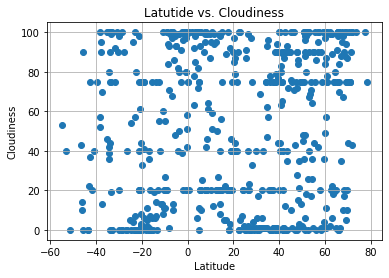

In [40]:
plt.scatter(weather_df["lat"], weather_df["clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Latutide vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latutide_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

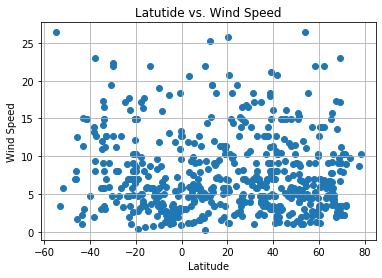

In [41]:
plt.scatter(weather_df["lat"], weather_df["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latutide vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latutide_vs_Wind_Speed.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots



In [51]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df['lat']>0]
northern_df



,city,lat,temp_max,lon,clouds,humidity,wind speed
2,misratah,32.38,66.52,15.09,6,69,7.45
8,harper,4.38,79.81,-7.72,72,84,5.01
10,oranjestad,12.52,84.20,-70.03,20,70,25.28
12,tazovskiy,67.47,23.74,78.70,95,99,1.99
13,jamestown,42.10,50.00,-79.24,1,37,10.29
...,...,...,...,...,...,...,...
553,kuryk,43.20,53.76,51.65,0,66,3.42
555,bagdarin,54.43,37.38,113.60,64,49,2.04
556,iralaya,15.00,87.80,-83.23,75,66,9.17
561,petropavlovsk-kamchatskiy,53.05,33.80,158.65,40,86,4.47


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [52]:
southern_df = weather_df[weather_df['lat']<0]
southern_df



,city,lat,temp_max,lon,clouds,humidity,wind speed
0,acarau,-2.89,78.96,-40.12,91,84,11.90
1,rikitea,-23.12,76.87,-134.97,57,83,17.69
3,ushuaia,-54.80,46.40,-68.30,53,70,26.40
4,bluff,-46.60,52.00,168.33,43,73,7.00
5,cape town,-33.93,62.01,18.42,0,72,5.82
...,...,...,...,...,...,...,...
558,maragogi,-9.01,78.71,-35.22,100,82,8.75
559,ahipara,-35.17,66.16,173.17,100,83,5.77
560,formosa do rio preto,-11.05,71.74,-45.19,13,78,4.07
562,tshikapa,-6.42,72.59,20.80,100,80,2.66


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.3773379779315456


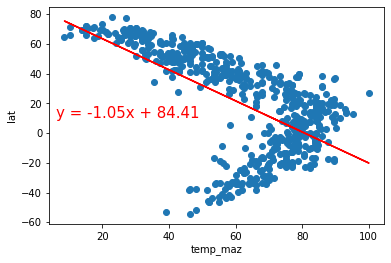

In [66]:
x_values = weather_df['temp_max'].astype('float')
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('temp_max')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.001059556056829559


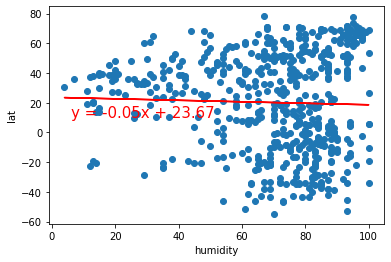

In [69]:
x_values = weather_df['humidity'].astype("float")
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('humidity')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.001059556056829559


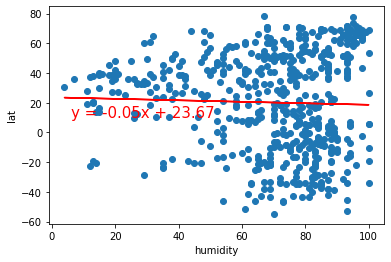

In [70]:
x_values = weather_df['humidity'].astype("float")
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('humidity')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.014063436994043594


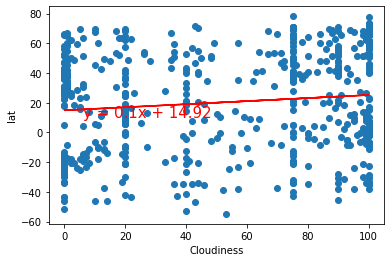

In [78]:
x_values = weather_df['clouds'].astype('float')
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.00630356271451006


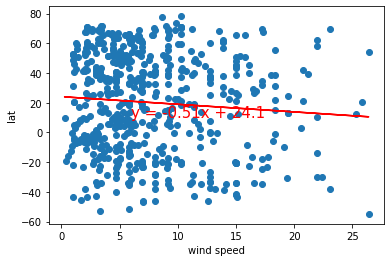

In [79]:
x_values = weather_df['wind speed'].astype("float")
y_values = weather_df['lat'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('wind speed')
plt.ylabel('lat')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression